In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools 

mariter = itertools.cycle(('o','s','^','p'))
# marker = next(mariter) # paste this to cycle through differt marker styles if needed

plt.rcParams['figure.figsize'] = [9,6] # size of the plot; use 3t:2t ratio; recommended 9:6 or 15:10
plt.rcParams['figure.dpi'] = 300 # quality of the plot; use 300 for debugging, 1000+ for quality
plt.rcParams['axes.titlesize'] = 20 # fontsize of the title
plt.rcParams['axes.labelsize'] = 16 # fontsize of the x- and y-axis labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the x-axis
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the y-axis
plt.rcParams['legend.markerscale'] = 1 # legend marker size
plt.rcParams['lines.markersize'] = 10 # marker size
plt.rcParams['lines.linestyle'] = '--' # line in between points; use 'None' or '--' (dashed)
plt.rcParams['lines.linewidth'] = 2 # width of line between points, if any
plt.rcParams['axes.titlepad'] = 15 # distance between plot area and title
plt.rcParams['axes.labelpad'] = 10 # distance between plot area and title

   Record     TestTime  Current/uA  Capacity/uAh  Voltage/V  Power/uW  \
0       1  00:00:00.00     -1000.0           0.0    -0.1442     144.2   
1       2  00:00:00.23     -1000.0           0.2    -0.1457     145.7   
2       3  00:00:00.40     -1000.0           0.2    -0.1566     156.6   
3       4  00:00:00.59     -1000.0           0.3    -0.1683     168.3   
4       5  00:00:00.79     -1000.0           0.3    -0.1762     176.3   

   dQ/dV/uAh/V  CycleNo  StepNo  
0            0        1       1  
1           -2        1       1  
2          -19        1       1  
3           -4        1       1  
4           -7        1       1  


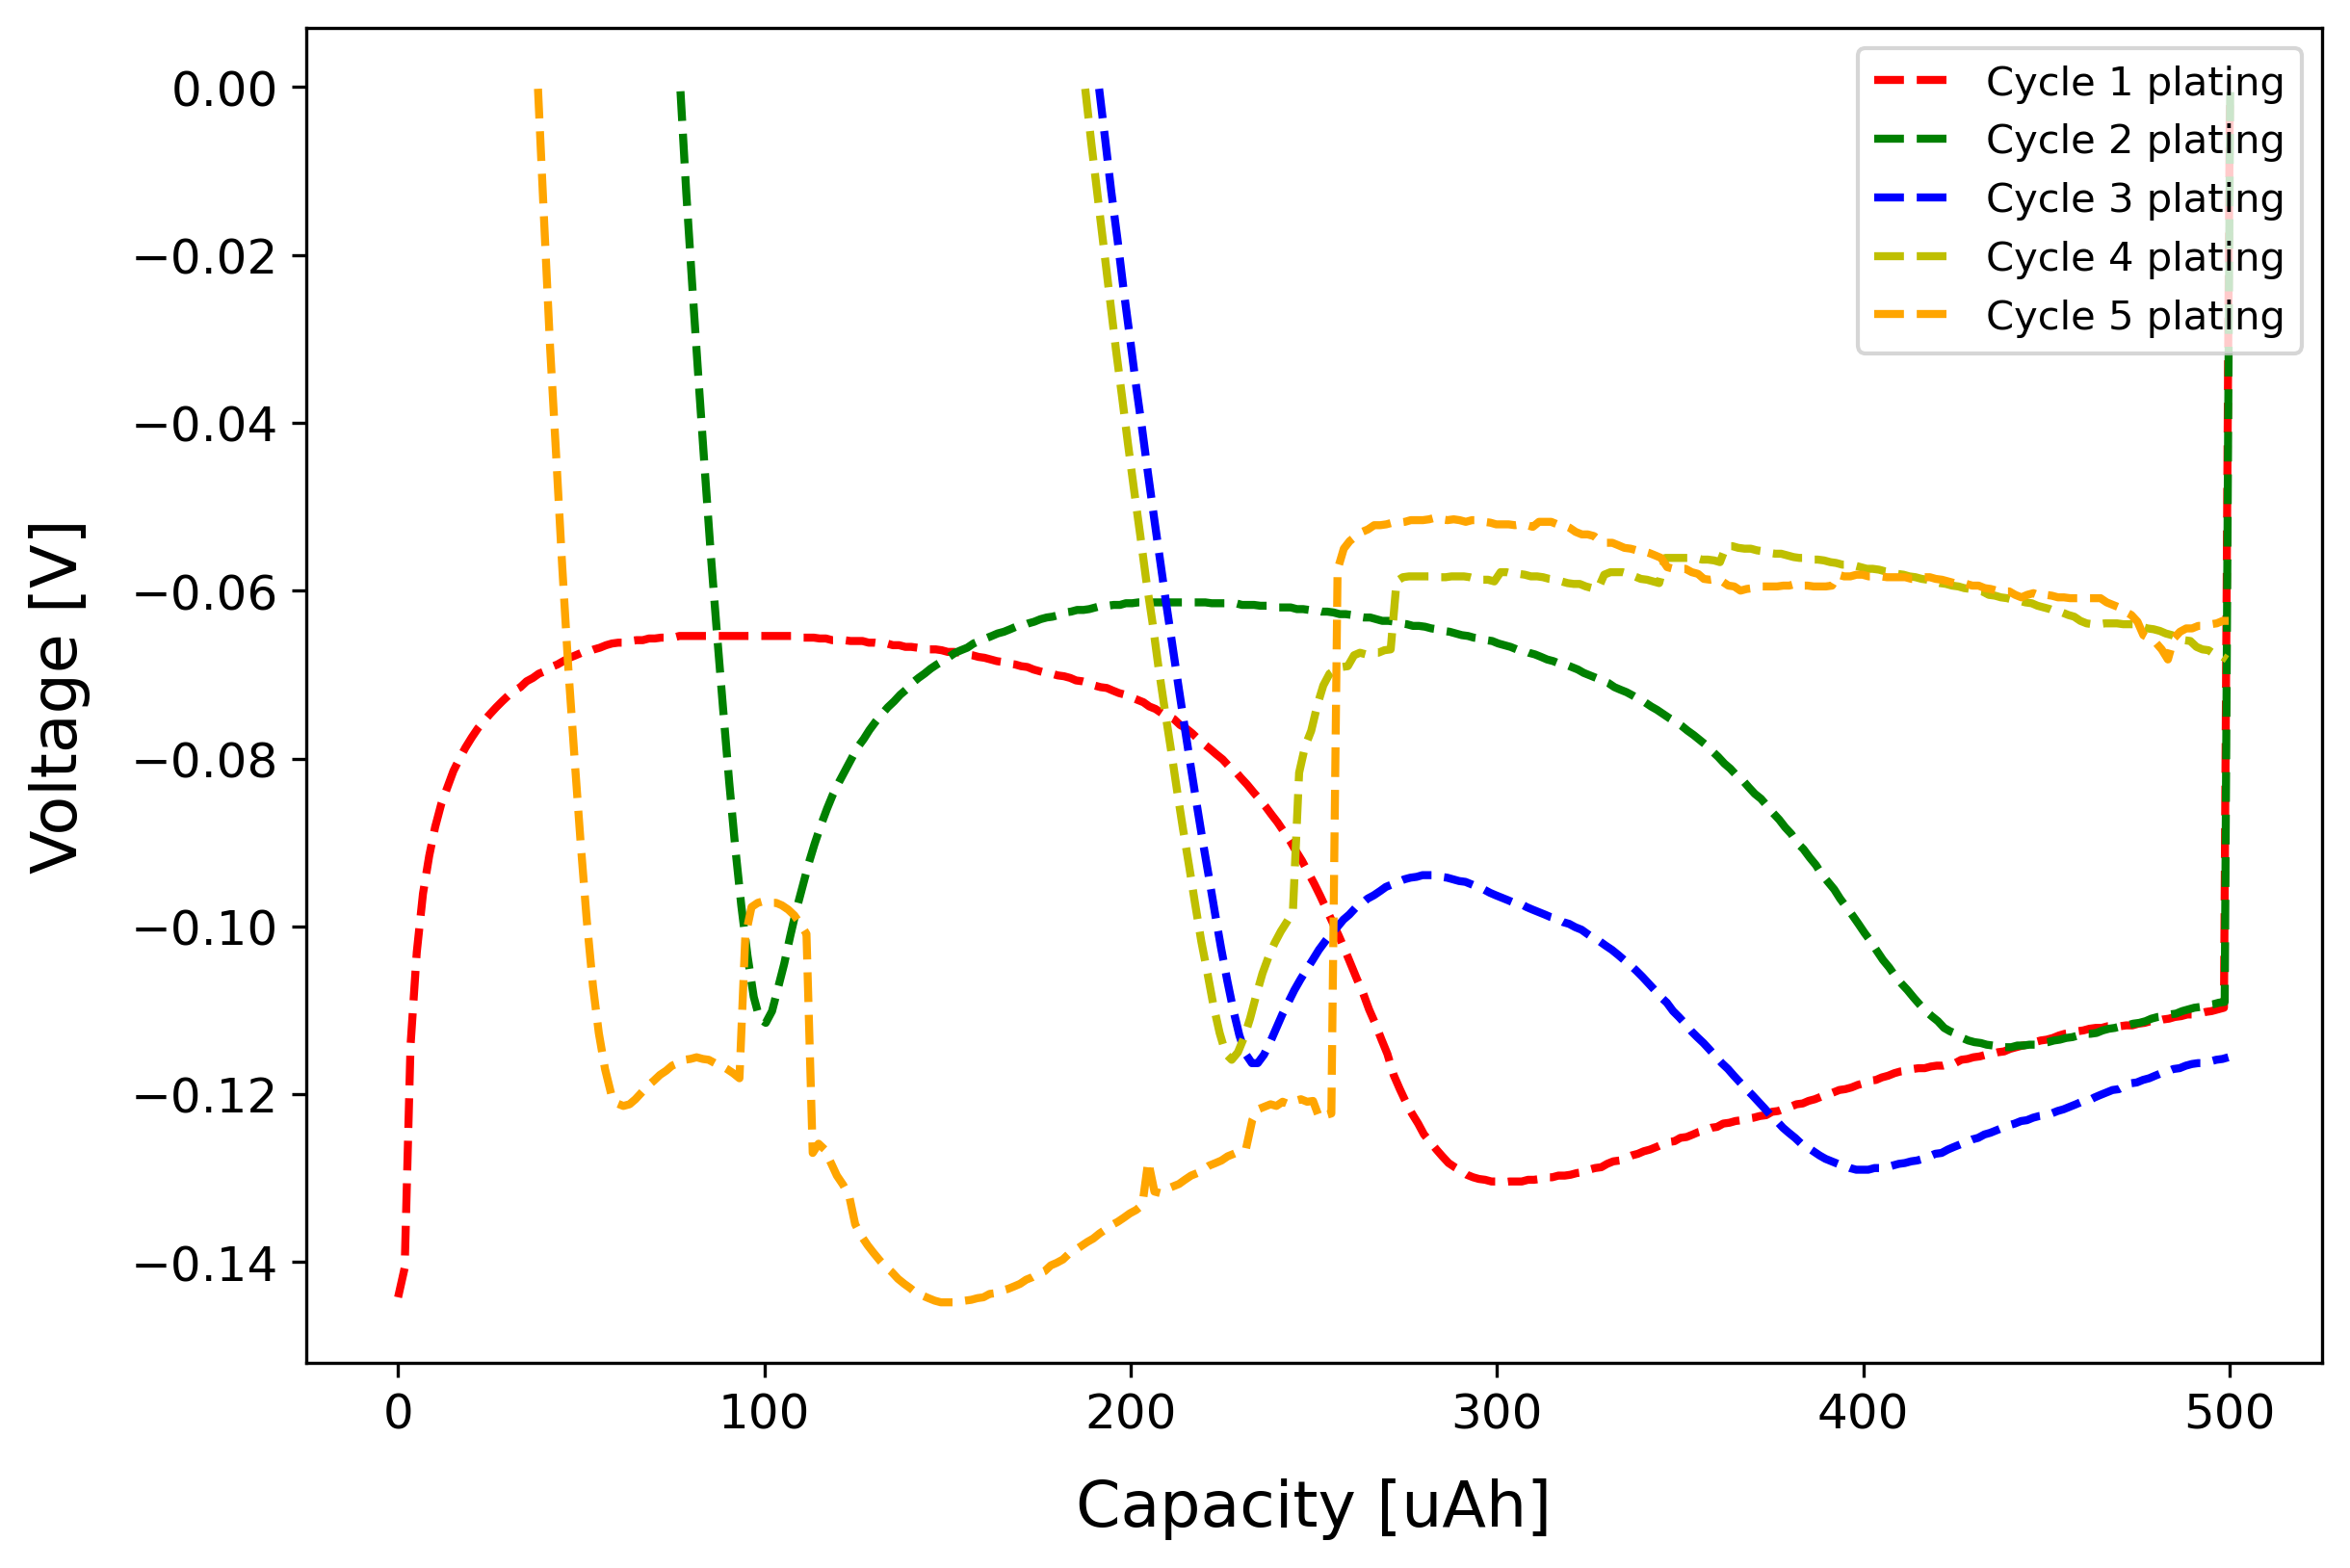

In [4]:
# Input file location
file_path = "/home/jovyan/work/General/Individual/Andre Tayamen/Data/Cycling - LAND/_001_5.csv"

df = pd.read_csv(file_path)
print(df.head())
cycles = df['CycleNo'].unique()
#colors = ['r','g','b','y','orange']

mean_kernel_50 = np.full((50,), 1/50)

for color,cycle in zip(colors,cycles):
    cycle_data = df[df['CycleNo']==cycle]
    cycle_data = cycle_data.sort_values(by="Capacity/uAh")
    plating = cycle_data[cycle_data['Voltage/V']<0]
    stripping = cycle_data[cycle_data['Voltage/V']>0]
    # print(plating)
    plt.plot(plating['Capacity/uAh'][::30],plating['Voltage/V'][::30], label=f'Cycle {cycle} plating', c = color)
    #plt.plot(stripping['Capacity/uAh'][::30],stripping['Voltage/V'][::30], label=f'Cycle {cycle} stripping', c = color)

plt.legend()
plt.xlabel('Capacity [uAh]')
plt.ylabel('Voltage [V]')
plt.show()